### todo

* Name muss geändert werden! (-> Florian)
  * Name: Practical Pre-Processing in Python, "elektrisch" muss vorkommen
* Journal (-> Maxi)
* Import Syscal mit IP (-> Maxi)
  * K-Faktoren berechnen (analytisch)
  * 
* Plotten (roh/gefiltert)
  * Histogramme
  * Pseudodaten
  * Abklingkurven
* Filtern
  * einfache Filter (auf query-Basis)
  * komplexe Filter (nötig?)
* Prozessierung
  * Mitteln Reziproke
  * Fehlermodell (eins als proof of concept)
* Export
  * res2inv
* Zeitbeispiel?



In [1]:
%matplotlib inline
import pandas as pd
pd.set_option('display.width', 1000)

## Importing the data

In [2]:
import edf

In [3]:
container = reda.ERT()

In [4]:
container.import_syscal_dat('data_normal.txt')

Summary:
                A           B           M           N  timestep           R          Vmn         Iab
count  990.000000  990.000000  990.000000  990.000000     990.0  990.000000   990.000000  990.000000
mean    15.333333   16.333333   32.666667   33.666667       0.0   -0.261351   -63.860000  253.030052
std     10.488088   10.488088   10.488088   10.488088       0.0    0.674262   165.987307   36.558830
min      1.000000    2.000000    4.000000    5.000000       0.0   -4.500319 -1270.656000  174.871000
25%      6.000000    7.000000   25.000000   26.000000       0.0   -0.119058   -29.012750  226.160000
50%     14.000000   15.000000   34.000000   35.000000       0.0   -0.018832    -4.703500  242.651000
75%     23.000000   24.000000   42.000000   43.000000       0.0   -0.004678    -1.145750  264.083000
max     44.000000   45.000000   47.000000   48.000000       0.0   -0.000399    -0.130000  358.089000


In [5]:
container.import_syscal_dat('data_reciprocal.txt', reciprocals=48)

renumbering electrode numbers
merging with existing data
Summary:
                A           B           M           N  timestep           R          Vmn         Iab
count  990.000000  990.000000  990.000000  990.000000     990.0  990.000000   990.000000  990.000000
mean    33.666667   32.666667   16.333333   15.333333       0.0   -0.252349   -62.052862  245.187235
std     10.488088   10.488088   10.488088   10.488088       0.0    0.644725   159.446455   29.501876
min      5.000000    4.000000    2.000000    1.000000       0.0   -4.233244 -1299.341000  195.595000
25%     26.000000   25.000000    7.000000    6.000000       0.0   -0.118134   -28.134000  225.730000
50%     35.000000   34.000000   15.000000   14.000000       0.0   -0.018884    -4.582000  243.030000
75%     43.000000   42.000000   24.000000   23.000000       0.0   -0.004723    -1.105500  269.272000
max     48.000000   47.000000   45.000000   44.000000       0.0   -0.000397    -0.105000  333.394000


## Computing K factors

In [6]:
import reda.utils.geometric_factors as edfK
K = edfK.compute_K_analytical(container.df, spacing=0.25)
edfK.apply_K(container.df, K)

,A,B,M,N,timestep,R,Vmn,Iab,K,rho_a,sigma_a
0,1,2,4,5,0,-3.906706,-1270.656,325.250,-18.849556,73.639666,0.013580
1,1,2,5,6,0,-1.418254,-461.287,325.250,-47.123890,66.833629,0.014963
2,1,2,6,7,0,-0.725030,-235.816,325.250,-94.247780,68.332465,0.014634
3,1,2,7,8,0,-0.381494,-124.081,325.250,-164.933614,62.921223,0.015893
4,1,2,8,9,0,-0.244796,-79.620,325.250,-263.893783,64.600224,0.015480
5,1,2,9,10,0,-0.189823,-61.740,325.250,-395.840674,75.139749,0.013309
6,1,2,10,11,0,-0.119680,-38.926,325.250,-565.486678,67.677585,0.014776
7,1,2,11,12,0,-0.080252,-26.102,325.250,-777.544182,62.399564,0.016026
8,1,2,12,13,0,-0.058297,-18.961,325.250,-1036.725576,60.437675,0.016546
9,1,2,13,14,0,-0.042469,-13.813,325.250,-1347.743248,57.237133,0.017471


In [11]:
import reda.utils.fix_sign_with_K as edffixK
edffixK.fix_sign_with_K(container.df)

,A,B,M,N,timestep,R,Vmn,Iab,K,rho_a,sigma_a
0,1,2,5,4,0,3.906706,1270.656,325.250,18.849556,73.639666,0.013580
1,1,2,6,5,0,1.418254,461.287,325.250,47.123890,66.833629,0.014963
2,1,2,7,6,0,0.725030,235.816,325.250,94.247780,68.332465,0.014634
3,1,2,8,7,0,0.381494,124.081,325.250,164.933614,62.921223,0.015893
4,1,2,9,8,0,0.244796,79.620,325.250,263.893783,64.600224,0.015480
5,1,2,10,9,0,0.189823,61.740,325.250,395.840674,75.139749,0.013309
6,1,2,11,10,0,0.119680,38.926,325.250,565.486678,67.677585,0.014776
7,1,2,12,11,0,0.080252,26.102,325.250,777.544182,62.399564,0.016026
8,1,2,13,12,0,0.058297,18.961,325.250,1036.725576,60.437675,0.016546
9,1,2,14,13,0,0.042469,13.813,325.250,1347.743248,57.237133,0.017471


## Plotting raw data

generating histogram plot for key: R
generating histogram plot for key: rho_a
generating histogram plot for key: Iab


{'all': <matplotlib.figure.Figure at 0x7f9909011b70>}

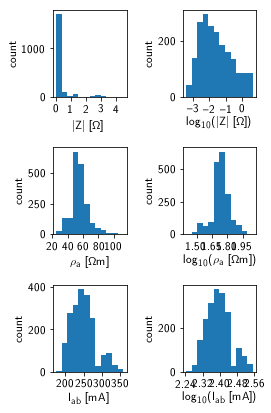

In [12]:
import reda.plotters as plotters
plotters.histograms.plot_histograms(container, ['R', 'rho_a', 'Iab', ])